# Hello Autoencoder linear PCA

Simple Autoencoder with linear only activations -> effectively performs a PCA

In [1]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
print("TensorFlow Version: ", tf.__version__)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.0.2
Pandas Version:  2.2.3
TensorFlow Version:  2.18.0


### Generate some 3D input data for the Autoencoder

In [2]:
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X_train = X + [0.2, 0, 0.2]  # shift a bit

In [12]:
print("Input shape: ", X_train.shape )

Input shape:  (60, 3)


Plot 3D Data

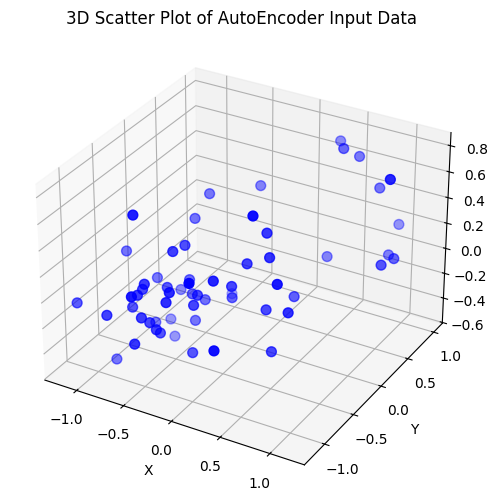

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Split into x, y, z components
x = X_train[:, 0]
y = X_train[:, 1]
z = X_train[:, 2]

# Create 3D plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='blue', s=50)

# Label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of AutoEncoder Input Data')

plt.show()


### Create & Train the Autoencoder

In [7]:
encoder = keras.Sequential([layers.Dense(2)])
decoder = keras.Sequential([layers.Dense(3)])

auto_encoder = keras.Sequential([encoder, decoder])

optimizer = keras.optimizers.SGD(learning_rate=0.5)

auto_encoder.compile(loss="mse", optimizer=optimizer)

In [8]:
auto_encoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Note that X_train is used as both the inputs and the targets.
history = auto_encoder.fit(X_train, X_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6739 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2776
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1820
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1324
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1111
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1068
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0906
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0865
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0830
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0728
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0719
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0668
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0671
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0634
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0596
Epoch 16/500
2/2 ━

In [13]:
auto_encoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Predict

Check how Encoder mapped 3D to 2D

In [10]:
codings = encoder.predict(X_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [11]:
print("Codings shape: ", codings.shape )

Codings shape:  (60, 2)


Plot 2D latent representation

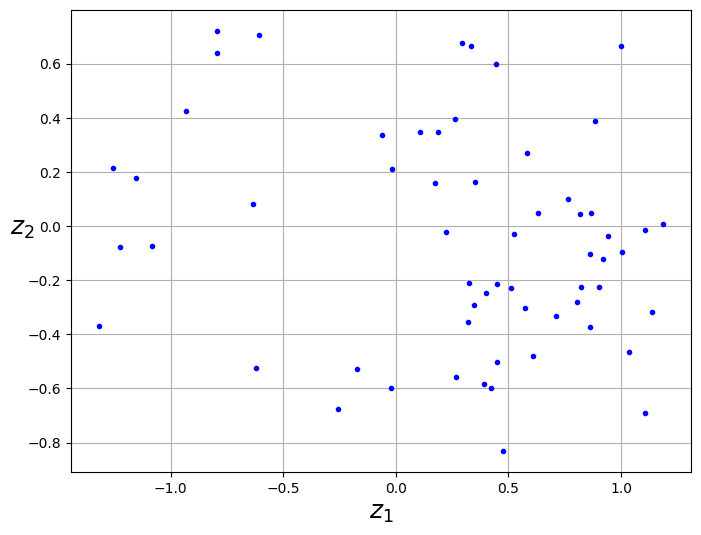

In [14]:
fig = plt.figure(figsize=(8,6))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

Run data thru full auto_encoder

In [15]:
Y = auto_encoder.predict(X_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [16]:
print("Output shape: ", Y.shape )

Output shape:  (60, 3)


Plot 3D output

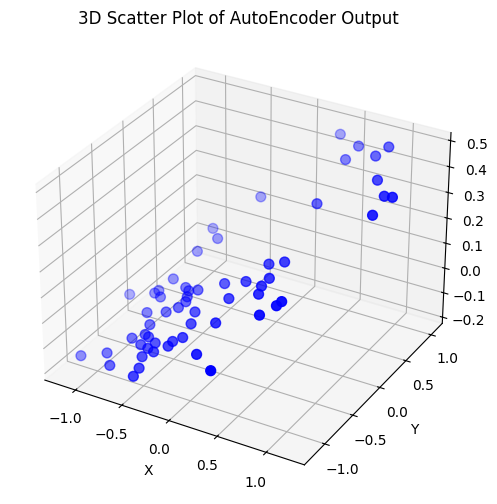

In [18]:
# Split into x, y, z components
x = Y[:, 0]
y = Y[:, 1]
z = Y[:, 2]

# Create 3D plot
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='blue', s=50)

# Label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of AutoEncoder Output ')

plt.show()